# Método de Cramer
- **Media muestral:**
$$
\bar{Z} = \dfrac{\sum_{t = 1}^{T}{Z_t}}{T}
$$
- **Varianza muestral:**
$$
\sigma^{2} = \dfrac{\sum_{t = 1}^{T}{(Z_t - \bar{Z}) ^ 2}}{T - 1}
$$
- **Auto - covarianza:**
$$
\gamma_{k} = \dfrac{\sum_{t = 1}^{T}{(Z_t - \bar{Z})(Z_{t + k} - \bar{Z})}}{T - 1}
$$
- **Auto - correlación:**
$$
\rho_{k} = \dfrac{\sum_{t = 1}^{T}{(Z_t - \bar{Z})(Z_{t + k} - \bar{Z})}}{\sum_{t = 1}^{T}{(Z_{t} - \bar{Z}) ^ 2}}
$$
- **Matriz de Phi_kk:**
$$
\phi_{kk} = \dfrac{
det\begin{vmatrix}
1 & \rho_{1} & \rho_{2} & \cdots & \rho_{k - 2} & \rho_{1}\\
\rho_{1} & 1 & \rho_{1} & \cdots & \rho_{k - 3} & \rho_{2}\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
\rho_{k - 1} & \rho_{k - 2} & \rho_{k - 3} & \cdots & \rho_{1} & \rho_{k}
\end{vmatrix}
}{
det\begin{vmatrix}
1 & \rho_{1} & \rho_{2} & \cdots & \rho_{k - 2} & \rho_{k - 1}\\
\rho_{1} & 1 & \rho_{1} & \cdots & \rho_{k - 3} & \rho_{k - 2}\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
\rho_{k-1} & \rho_{k-2} & \rho_{k-3} & \cdots & \rho_{1} & 1
\end{vmatrix}
}
$$
- **ACF:** Evalua la autocovarianza siendo el promedio de las covarianzas de las variables aleatorias realizadas que se encuentran en una separación de _k_ periodos de tiempo.
  
  Supuesto del valor esperado de E[Z_t] = 0
- **PACF:** Evalua la correlación entre Z_t y Z_t+k después de remover la dependencia lineal con los datos intermedios.
  
  Se debe de cumplir ceteris paribus.

## Procedimiento en muestra

In [10]:
# Llamado de librerias
library(dplyr)
library(ggplot2)
library(lmtest)
library(gtools)
library(shiny)

In [11]:
# Importando archivo .csv
File = read.csv(file = ('../Ejercicio inflación/Inflación.csv'), skip = 0, header = TRUE)
head(File)
sprintf('El número de observaciones son: %s', length(File[, 1]))

,Fecha,Inflacion
,<chr>,<dbl>
1,2001/01/31,8.4922
2,2001/02/28,8.0583
3,2001/03/31,7.8143
4,2001/04/30,7.9759
5,2001/05/31,7.8654
6,2001/06/30,7.9298


[1] "El número de observaciones son: 216"

In [12]:
# Inputs 
k = 36                                  # 'Truncado' para (T / 4), si no ingrese el valor numérico

# Parámetros y transformaciones lineales
X = File$Inflacion
T = length(X)

# Construcción de los vectores
X = cbind(X)

In [191]:
# Condición de k
if (k == 'Truncado'){
    k = length(File[, 1]) / 4
} else {
    k = k
}

# Cálculo de variables
Zb = sum(X) / T                                         # Media muestral
Gamma = matrix(data = NA)                               # Auto - covarianza
for (i in 0 : k){
    Gamma[i + 1] = sum((X[1 : (T - i)] - Zb) * (X[(i + 1) : T] - Zb)) / (T - 1)
}
ACF = matrix(data = NA, nrow = 36, ncol = 1)                                 # ACF
for (i in 0 : k){
    ACF[i + 1] = Gamma[i + 1] / Gamma[1]
}
PACF = matrix(data = NA)                                 # PACF
Den = matrix(data = NA, nrow = k, ncol = k)
Num = matrix(data = NA, nrow = k, ncol = k)
for(i in 1 : k){
    for(j in 1: (k - i + 1)){
        Den[j, j + i - 1] = ACF[i]
        Den[j + i - 1, j] = ACF[i]
    }
}
for (i in 2 : k + 1){
    Num = Den
    Num[1 : i, i] = ACF[2 : (i + 1)] 
    PACF[i] = det(Num[1 : i, 1 : i]) / det(Den[1 : i, 1 : i])
}


ERROR: Error in `[<-`(`*tmp*`, 1:i, i, value = ACF[2:(i + 1)]): subscript out of bounds


In [219]:
for (i in 2 : k){
    for (j in 2 : k){
        Num = Den
        Num[1 : j, j] = ACF[2 : (j + 1)] 
    }
    PACF[i] = det(Num[1 : i, 1 : i]) / det(Den[1 : i, 1 : i])
}
PACF

[1]  1.00000000  1.00000000  1.00000000  1.00000000  1.00000000  1.00000000
 [7]  1.00000000  1.00000000  1.00000000  1.00000000  1.00000000  1.00000000
[13]  1.00000000  1.00000000  1.00000000  1.00000000  1.00000000  1.00000000
[19]  1.00000000  1.00000000  1.00000000  1.00000000  1.00000000  1.00000000
[25]  1.00000000  1.00000000  1.00000000  1.00000000  1.00000000  1.00000000
[31]  1.00000000  1.00000000  1.00000000  1.00000000  1.00000000 -0.05218492

In [217]:
Num[1 : 4, 4] = ACF[2 : 5]

det(Num[1 : 4, 1 : 4])

det(Den[1 : 4, 1 : 4])


[1] -9.143038e-06

[1] 0.0001047359

In [190]:
Num[1 : 2, 2] = ACF[2 : 3]

Num[1 : 2, 1 : 2]

1.0000000,0.9749577
0.9749577,0.9376602


In [186]:
Num[, 1 : 2]
Den[1 : 2, 1 : 2]

1.0000000000,0.9749576796
0.9749576796,1.0000000000
0.9376602373,0.9749576796
0.8955717928,0.9376602373
0.8489620778,0.8955717928
0.7976820333,0.8489620778
0.7426667473,0.7976820333
0.6840962797,0.7426667473
0.6253248144,0.6840962797
0.5677722664,0.6253248144
0.5093004337,0.5677722664


1.0000000,0.9749577
0.9749577,1.0000000


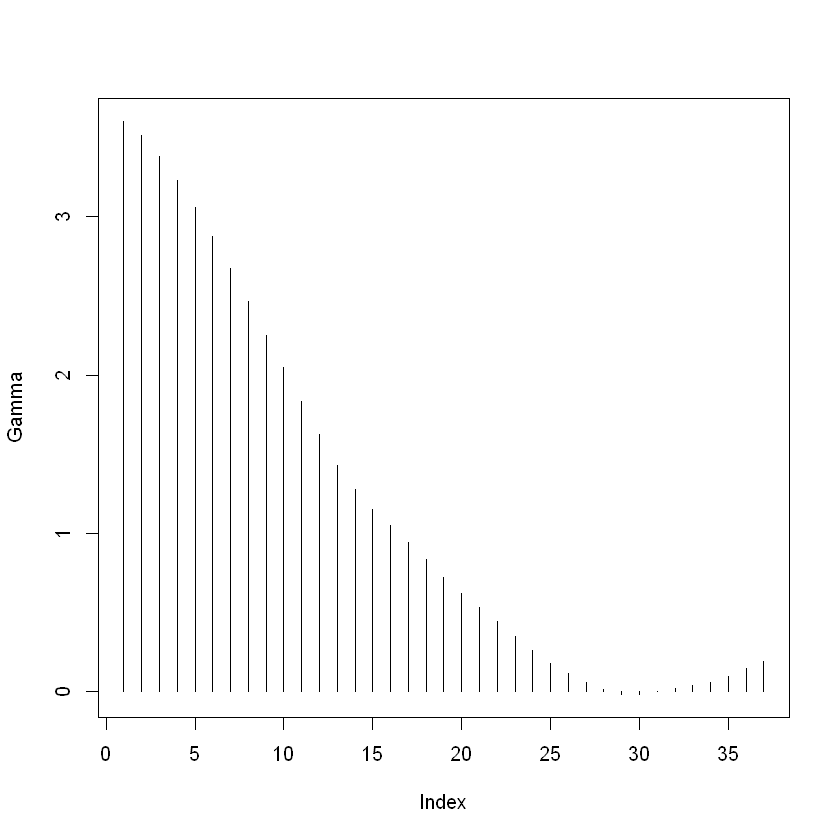

In [6]:
# Gráfica conjunta de
# Auto - covarianzas (Gamma)
plot(Gamma, type = 'h')